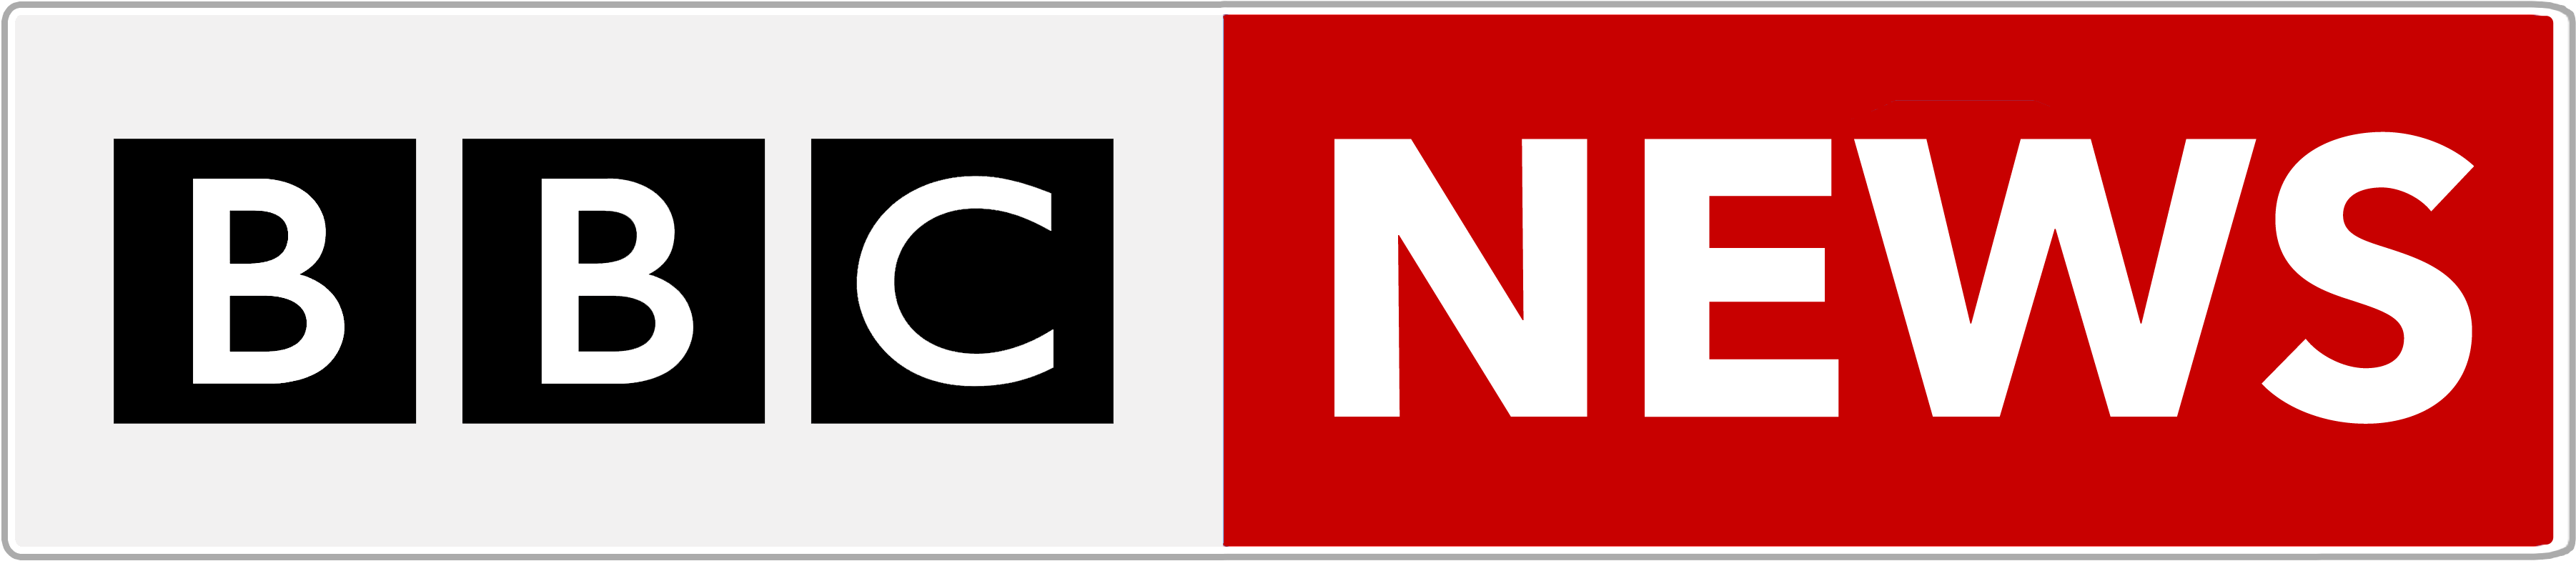

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replac

Mounted at /content/drive


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

#Task 2: Topic Modeling on News Articles
Description:


*   Dataset (Recommended): BBC News Dataset (Kaggle).
*   Discover hidden topics or themes in a collection of news articles or blog posts

*  Preprocess the text: tokenization, lowercasing, stopword removal
*  Apply Latent Dirichlet Allocation (LDA) to extract dominant topics
 Display the most significant words per topic.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bbc-news/bbc_news.csv


In [3]:
df = pd.read_csv("/kaggle/input/bbc-news/bbc_news.csv")
df.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [4]:
#EDA
df.shape

(42115, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42115 entries, 0 to 42114
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        42115 non-null  object
 1   pubDate      42115 non-null  object
 2   guid         42115 non-null  object
 3   link         42115 non-null  object
 4   description  42115 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


In [6]:
df.isnull().sum()

,0
title,0
pubDate,0
guid,0
link,0
description,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.sample(4)

,title,pubDate,guid,link,description
2637,London election results 2022: What does it mea...,"Fri, 06 May 2022 10:38:24 GMT",https://www.bbc.co.uk/news/uk-england-london-6...,https://www.bbc.co.uk/news/uk-england-london-6...,"What does the loss of Westminster, Wandsworth ..."
31443,Is my family still alive? The daily question f...,"Sun, 31 Mar 2024 20:04:39 GMT",https://www.bbc.co.uk/news/world-latin-america...,https://www.bbc.co.uk/news/world-latin-america...,Haiti has endured crisis after crisis. Now the...
10236,Cancer care delays: How bad are they in your a...,"Thu, 10 Nov 2022 11:35:06 GMT",https://www.bbc.co.uk/news/health-63573718,https://www.bbc.co.uk/news/health-63573718?at_...,BBC analysis shows delays have doubled in past...
13228,Premier League transfers: Record spending set ...,"Mon, 30 Jan 2023 18:37:23 GMT",https://www.bbc.co.uk/sport/football/64455271,https://www.bbc.co.uk/sport/football/64455271?...,The Premier League transfer window closes on T...


In [9]:
df = df[['title','description']]
df.head()

,title,description
0,Ukraine: Angry Zelensky vows to punish Russian...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,Consumers are feeling the impact of higher ene...


In [10]:
df['text'] = df['title'].astype(str) + " " + df['description'].astype(str)
df = df[['text']]
df.head()

,text
0,Ukraine: Angry Zelensky vows to punish Russian...
1,War in Ukraine: Taking cover in a town under a...
2,Ukraine war 'catastrophic for global food' One...
3,Manchester Arena bombing: Saffie Roussos's par...
4,Ukraine conflict: Oil price soars to highest l...


# **Preprocessing**

In [11]:
import re
import nltk

In [12]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
import spacy
import re
from nltk.corpus import stopwords

In [14]:
import en_core_web_sm

stop_words = set(stopwords.words('english'))
nlp = en_core_web_sm.load()

In [15]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc
              if token.lemma_ not in stop_words and len(token) > 2]

    return tokens

In [16]:
df['tokens'] = df['text'].apply(preprocess)

In [17]:
df[['text', 'tokens']].head(10)

,text,tokens
0,Ukraine: Angry Zelensky vows to punish Russian...,"[ukraine, angry, zelensky, vow, punish, russia..."
1,War in Ukraine: Taking cover in a town under a...,"[war, ukraine, take, cover, town, attack, jere..."
2,Ukraine war 'catastrophic for global food' One...,"[ukraine, war, catastrophic, global, food, one..."
3,Manchester Arena bombing: Saffie Roussos's par...,"[manchester, arena, bombing, saffie, roussoss,..."
4,Ukraine conflict: Oil price soars to highest l...,"[ukraine, conflict, oil, price, soar, high, le..."
5,Ukraine war: PM to hold talks with world leade...,"[ukraine, war, hold, talk, world, leader, sanc..."
6,Ukraine war: UK grants 50 Ukrainian refugee vi...,"[ukraine, war, grant, ukrainian, refugee, visa..."
7,TikTok limits services as Netflix pulls out of...,"[tiktok, limit, service, netflix, pull, russia..."
8,"Covid: Fourth jab for Scotland's vulnerable, a...","[covid, fourth, jab, scotland, vulnerable, tes..."
9,Protests across Russia see thousands detained ...,"[protest, across, russia, see, thousand, detai..."


# **TfidfVectorizer**

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000) # stop_words='english' is not needed as we removed stop words in preprocessing

# Fit and transform the processed text
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tokens'].astype(str)) # Use 'tokens' column and convert to string

print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (42115, 1000)


# **LDA (Latent Dirichlet Allocation)**

In [24]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA model
# You can adjust n_components (number of topics) as needed
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)

# Fit LDA model to the TF-IDF matrix
lda_matrix = lda_model.fit_transform(tfidf_matrix)

print("LDA matrix shape:", lda_matrix.shape)

LDA matrix shape: (42115, 10)


In [27]:
# Get the feature names (words) from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Function to display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_): # Corrected attribute name
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("\n")

# Display the top 10 words for each topic
no_top_words = 10
display_topics(lda_model, feature_names, no_top_words)

Topic 1:
police man kill murder say die death find woman arrest
Topic 2:
ukraine war strike russian russia say ukrainian putin attack israel
Topic 3:
say school ban sell new firm online work use woman
Topic 4:
rise cost price energy rate bill people say food high
Topic 5:
storm weather image picture world climate year across around flood
Topic 6:
cup world league england win manchester beat final united city
Topic 7:
election minister say labour party sunak vote tory leader covid
Topic 8:
paper medium social front page lead asylum say protest migrant
Topic 9:
trump england win gold test paris president olympic south africa
Topic 10:
star queen king die film show year say royal singer




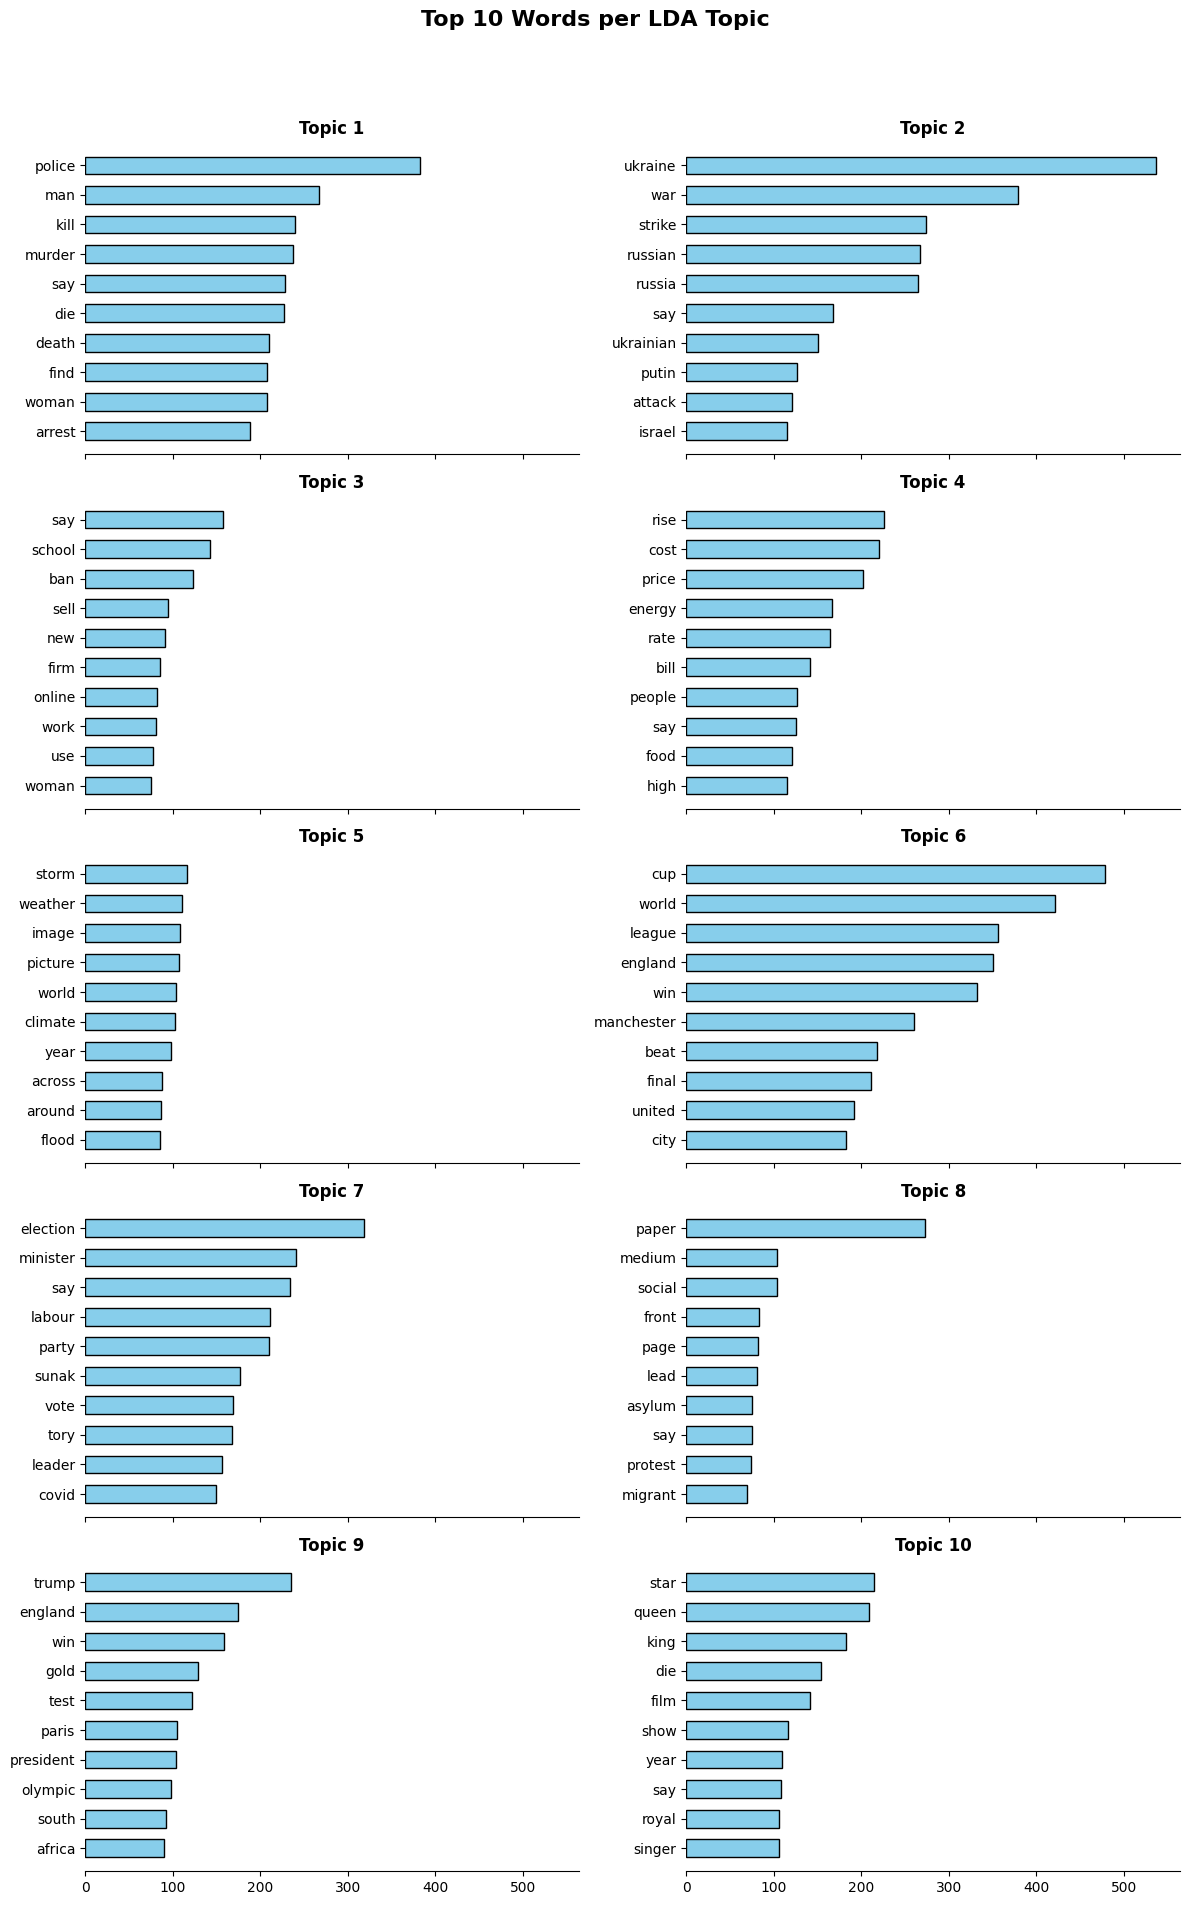

In [33]:
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, no_top_words=10, title="Top Words per Topic"):
    """
    Plots the top words for each topic in a topic model.

    Parameters:
    - model: Fitted topic model (e.g., LDA, NMF)
    - feature_names: List of feature names (e.g., vocabulary)
    - no_top_words: Number of top words to display per topic
    - title: Overall plot title
    """
    n_topics = model.n_components
    n_rows = (n_topics + 1) // 2  # Arrange in 2 columns

    fig, axes = plt.subplots(
        n_rows, 2, figsize=(12, n_rows * 4), sharex=True
    )
    axes = axes.flatten()

    for topic_idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[:-no_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_indices]
        weights = topic[top_indices]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.6, color='skyblue', edgecolor='black')
        ax.set_title(f"Topic {topic_idx + 1}", fontsize=12, weight='bold')
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
        for spine in ["top", "right", "left"]:
            ax.spines[spine].set_visible(False)

    # Hide unused subplots
    for i in range(topic_idx + 1, len(axes)):
        fig.delaxes(axes[i])

    fig.suptitle(title, fontsize=16, weight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage:
plot_top_words(lda_model, feature_names, no_top_words=10, title="Top 10 Words per LDA Topic")



# Bonus:
1.   Compare LDA vs. NMF performance
2.   Use pyLDAvis or word clouds to visualize topic-word distributions




In [35]:
from sklearn.decomposition import NMF

# Initialize NMF model
# You can adjust n_components (number of topics) as needed, using the same number as LDA for comparison
nmf_model = NMF(n_components=lda_model.n_components, random_state=42, init='nndsvda', max_iter=200)

# Fit NMF model to the TF-IDF matrix
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)

print("NMF matrix shape:", nmf_matrix.shape)

# Display the top 10 words for each NMF topic
print("\nTop 10 words per NMF Topic:")
display_topics(nmf_model, feature_names, no_top_words)

NMF matrix shape: (42115, 10)

Top 10 words per NMF Topic:
Topic 1:
year new bbc show first star make one tell time
Topic 2:
world cup final womens championship qatar france argentina semifinal beat
Topic 3:
ukraine war russian russia ukrainian putin invasion attack russias kyiv
Topic 4:
police man die woman murder find kill attack arrest death
Topic 5:
win league manchester city premier united title beat champion liverpool
Topic 6:
say israel gaza people boss would want family make government
Topic 7:
england euro test wale australia series win captain ashe nation
Topic 8:
rise price cost rate energy bill people high live help
Topic 9:
strike day week pay seven take past go picture image
Topic 10:
election party labour vote minister sunak leader tory paper general




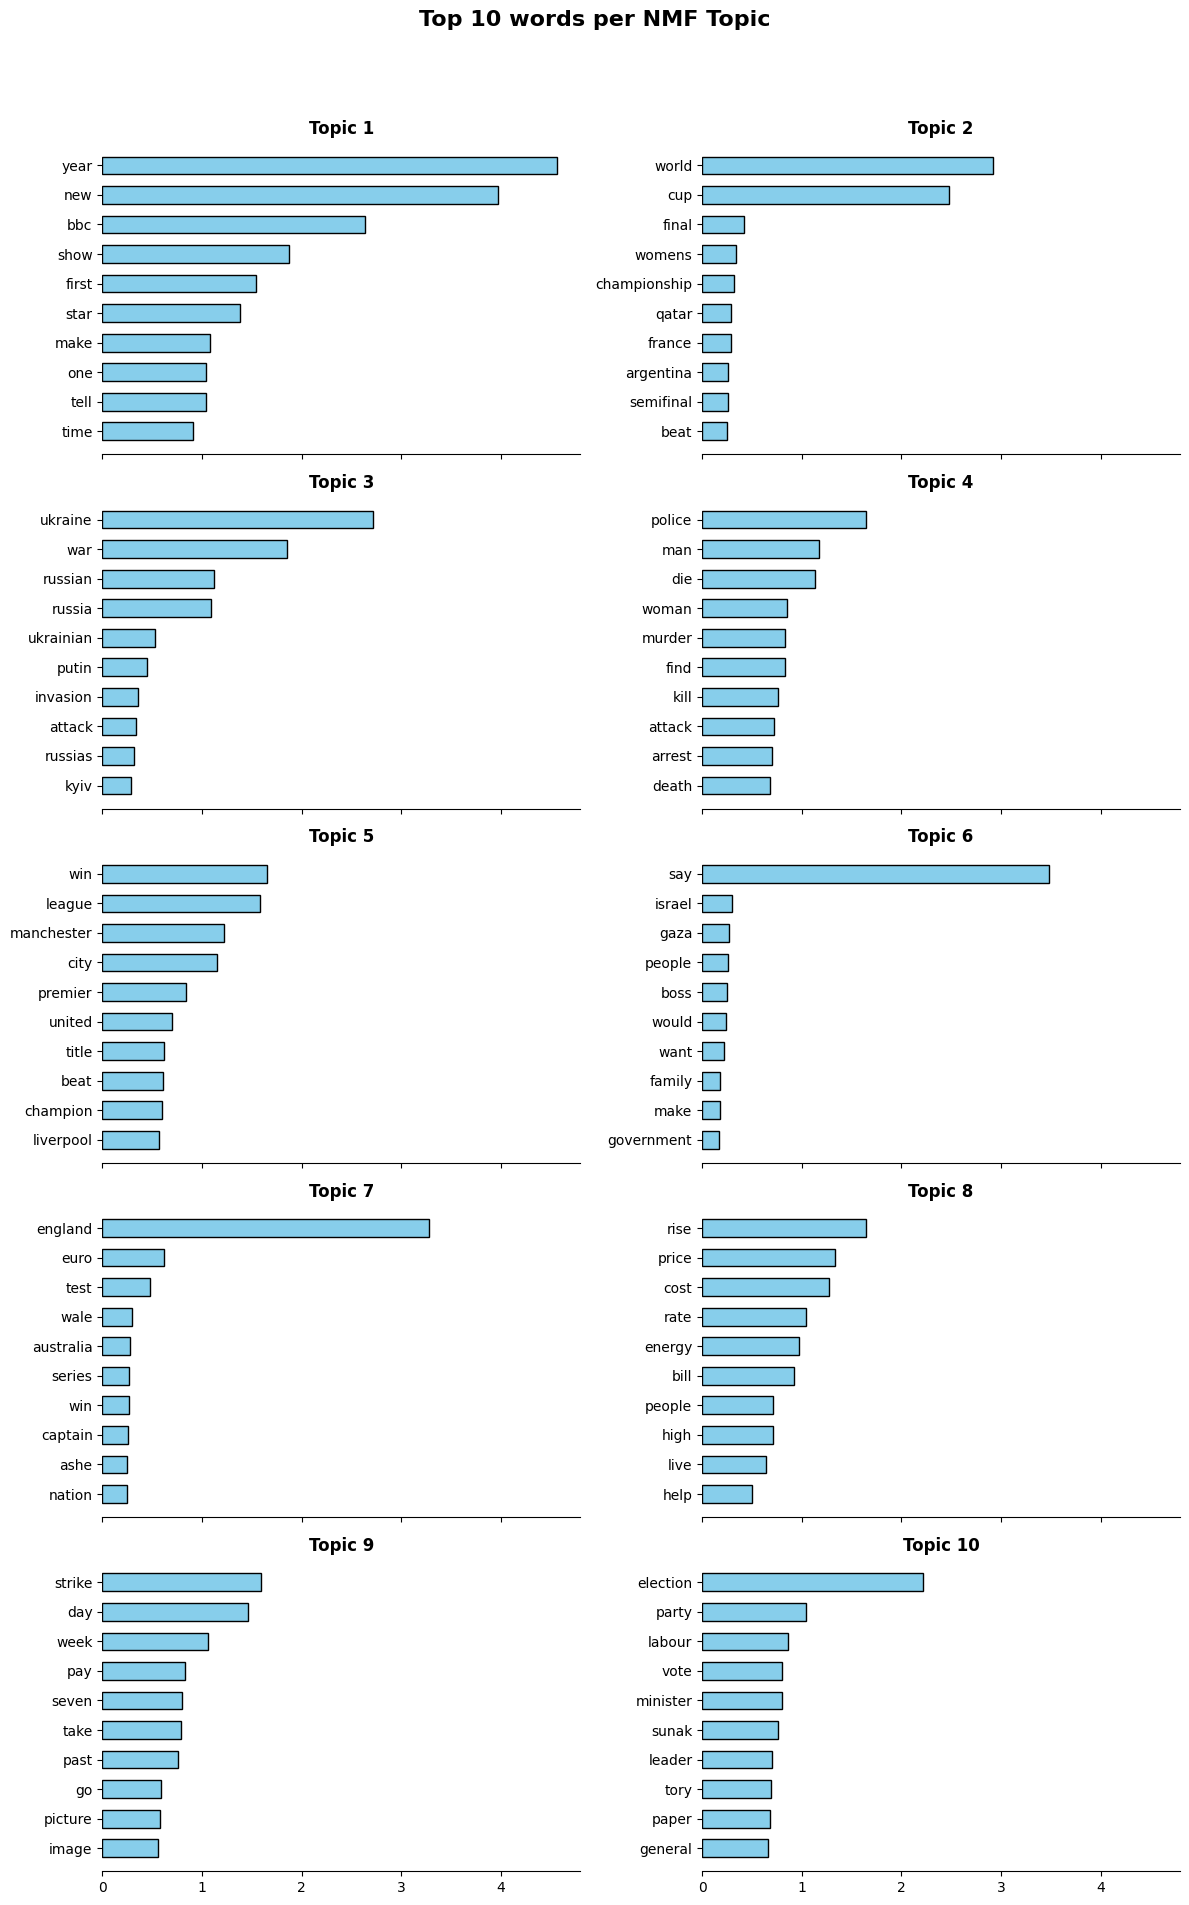

In [37]:
# Plot the top 10 words for each NMF topic
plot_top_words(nmf_model, feature_names, no_top_words, 'Top 10 words per NMF Topic')

In [38]:
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)
print("Shape of LDA matrix:", lda_matrix.shape)
print("Shape of NMF matrix:", nmf_matrix.shape)

Shape of TF-IDF matrix: (42115, 1000)
Shape of LDA matrix: (42115, 10)
Shape of NMF matrix: (42115, 10)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

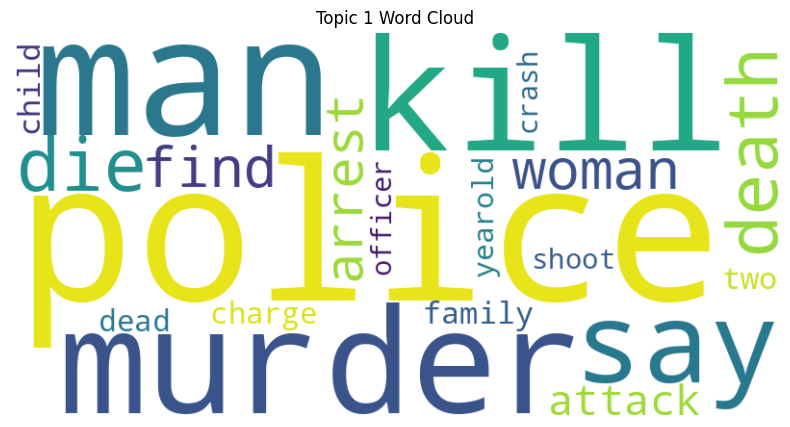

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

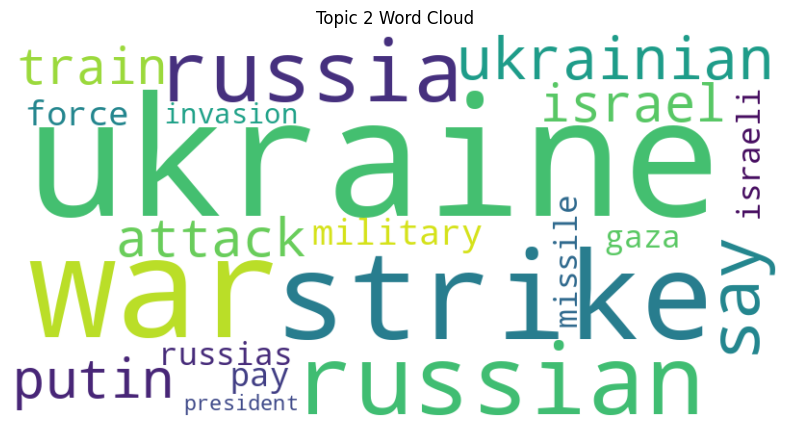

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

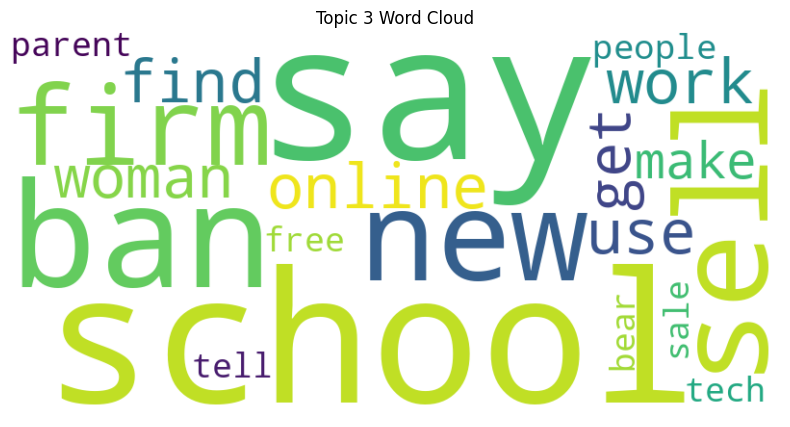

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

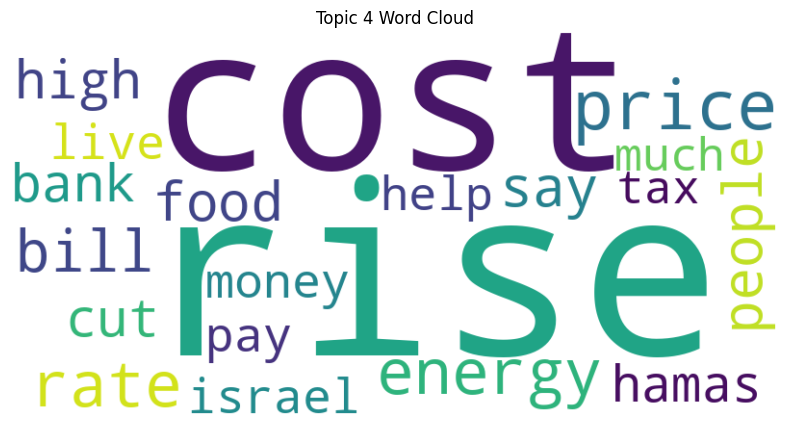

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

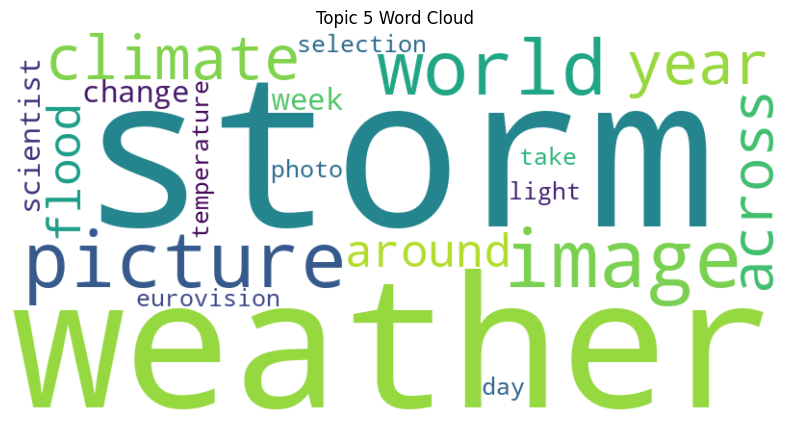

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

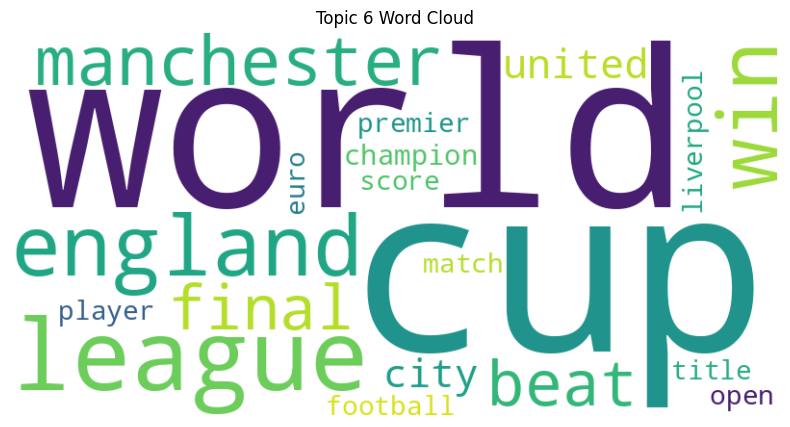

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

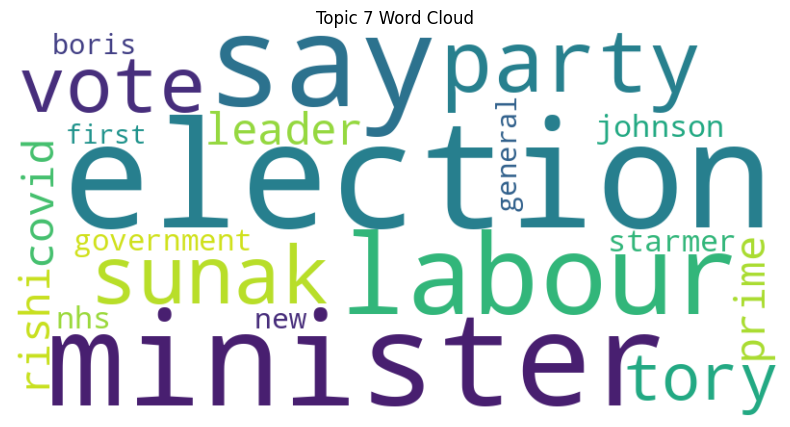

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

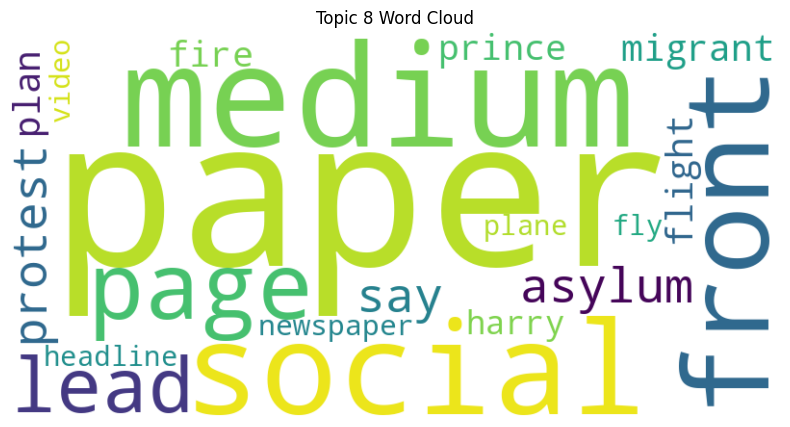

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

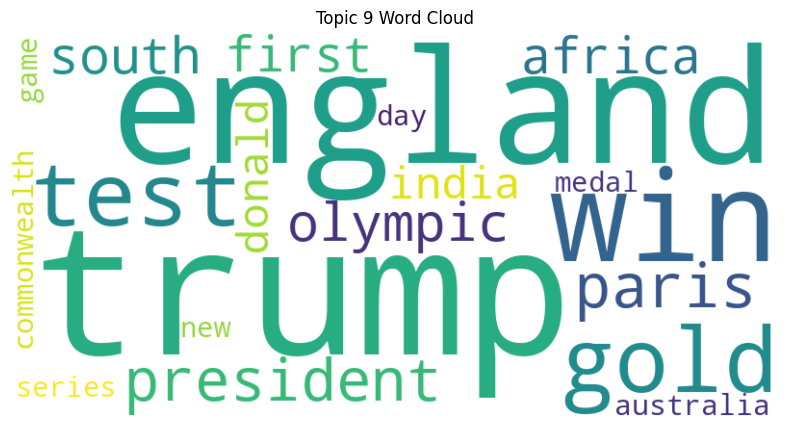

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

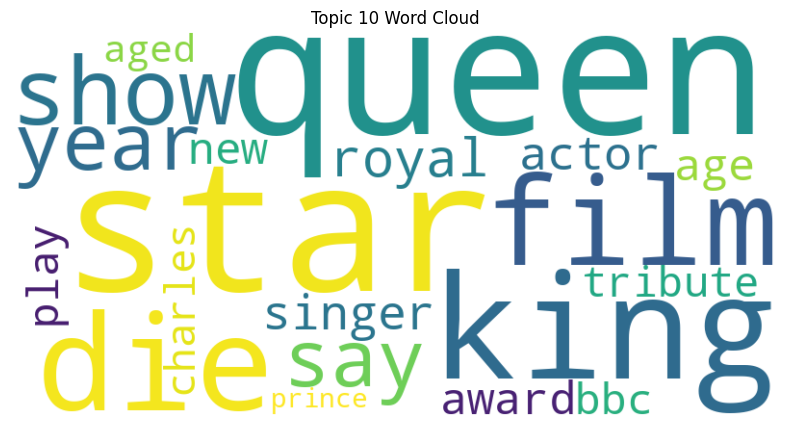

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordclouds(model, feature_names, num_topics, no_top_words=20):
    """
    Generates word clouds for each topic.

    Parameters:
    - model: Fitted topic model (e.g., LDA, NMF)
    - feature_names: List of feature names (e.g., vocabulary)
    - num_topics: Number of topics in the model
    - no_top_words: Number of top words to consider for the word cloud
    """
    for topic_idx, topic in enumerate(model.components_):
        # Get top words and their weights
        top_features_ind = topic.argsort()[:-no_top_words - 1:-1]
        top_features = [(feature_names[i], topic[i]) for i in top_features_ind]

        # Create a dictionary of word weights
        word_weights = dict(top_features)

        # Generate word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_weights)

        # Display the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Topic {topic_idx + 1} Word Cloud")
        plt.show()

# Generate word clouds for LDA topics
generate_wordclouds(lda_model, feature_names, lda_model.n_components)

# **THE END!**